In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from matplotlib.pyplot import figure

In [2]:
def ω_qnm(q,n,m,r1,r2,L):
    return constants.c/2/L*(q+(n+m+1)*np.arccos(np.sqrt((1-L/r1)*(1-L/r2)))/np.pi)


def ωct_qnm(q,n,m,r1,r2,L):
    return constants.c/4/(L*0.999)*(q+(n+m+1)*np.arccos(np.sqrt((1-L/r1)*(1-L/r2)))/np.pi)

def fsr(L):
    return constants.c/2/L

def finesse(r1,r2):
    return np.pi*np.sqrt(r1*r1)/(1-r1*r2)

def g(R,L):
    return 1-L/R

def dx(g1,g2,L,theta1,theta2):
    return g2*L*theta1/(1-g1*g2)+L*theta2/(1-g1*g2)

def dtheta(g1,g2,theta1,theta2):
    return ((1-g2)*theta1 - (1-g1)*theta2)/(1-g1*g2)

def waist(λ,L,R):
    return np.sqrt(λ*L/2/np.pi*2*R/L/np.sqrt(2*R/L-1))

def waist0(λ,L,R):
    return np.sqrt(λ*L/2/np.pi*np.sqrt(2*R/L-1))

In [3]:
#piezo glue expansion

exp_coeff = 54e-6
dl = 1e-3*0.1*exp_coeff
print(dl)
r1 = 0.15
r2 = 0.15

l = 0.1552
ω_qnm(276752,0,0,r1,r2,l) - ω_qnm(276752,0,0,r1,r2,l+dl)

print(np.sqrt((1-l/r1)*(1-l/r2)))


5.4e-09
0.034666666666666845


In [4]:
finesse(0.9995,0.9995)

3140.807059028211

0.5876470588235294

0.8499872487248725
fsr= 999.3081933333334 MHz
finesse = 2243.209079415061
linewidth= 445.48152131851793 kHz


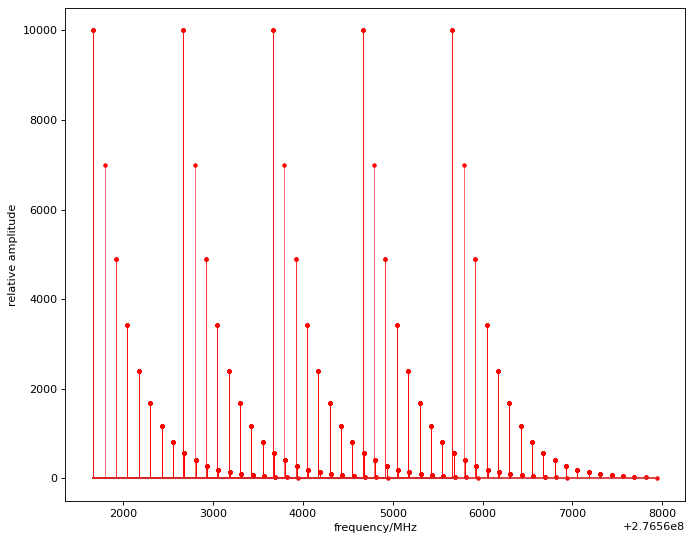

In [7]:
r1 = 9999
r2 = 1
l = 0.15
R1=0.9993
R2=0.9993
figure(figsize=(10, 8), dpi=80)
g1 = g(r1,l)
g2 = g(r2,l)
print(g1*g2)
x = []
y=[]

lsize =0.5

for i in range(0,5):
    x.append(int(ω_qnm(276753+i,0,0,r1,r2,l))/1e6)
    y.append(int(100*100))

markers,stems,base = plt.stem(x,y,'r')
stems.set_linewidth(lsize)
markers.set_marker('.')

markers,stems,base = plt.stem(x,y,'r')
stems.set_linewidth(lsize)
markers.set_marker('.')
for i in range (0,5):
    for j in range(1,10):
        for k in range(0,10):
            x.append(int(ω_qnm(276753+i,j,k,r1,r2,l))/1e6)
            y.append(int(100*0.7**j*100*0.7**k))

markers,stems,base = plt.stem(x,y,'r')
stems.set_linewidth(lsize)
markers.set_marker('.')

print('fsr=',fsr(l)/1e6,'MHz')
print('finesse =', finesse(R1,R2))
print('linewidth=', fsr(l)/finesse(R1,R2)/1000,'kHz')

stems.set_linewidth(lsize)
plt.xlabel("frequency/MHz")
plt.ylabel("relative amplitude")
plt.show()

Text(0.5, 1.0, 'TEM00 mode and other modes beside it')

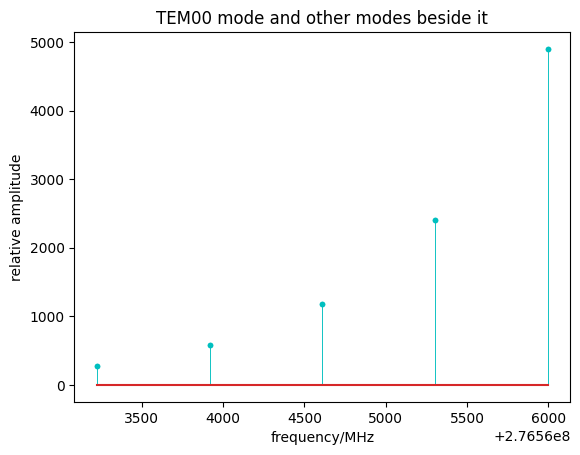

In [12]:
x1 = []
y1 = []
for i  in range(0,5):
    x1.append(int(ω_qnm(276753+i,10-2*i,0,r1,r2,l))/1e6)
    y1.append(int(100*100*0.7**(10-2*i)))

for i  in range(0,5):
    x1.append(int(ω_qnm(276753+i,0,10-2*i,r1,r2,l))/1e6)
    y1.append(int(100*100*0.7**(10-2*i)))


markers,stems,base = plt.stem(x1,y1,'c')
stems.set_linewidth(lsize)
markers.set_marker('.')
plt.xlabel("frequency/MHz")
plt.ylabel("relative amplitude")
plt.title("TEM00 mode and other modes beside it")


Text(0.5, 1.0, 'frequency difference between modes')

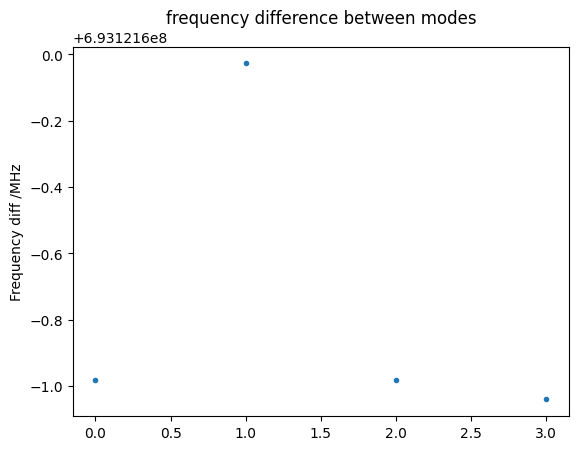

In [7]:
x_dif = []
for i in range(0,4):
    x_dif.append((x1[4-i]-x1[3-i])*1e6)

plt.plot(x_dif,'.')
plt.ylabel("Frequency diff /MHz")
plt.title("frequency difference between modes")


0.7857024988213107


NameError: name 'ωc_qnm' is not defined

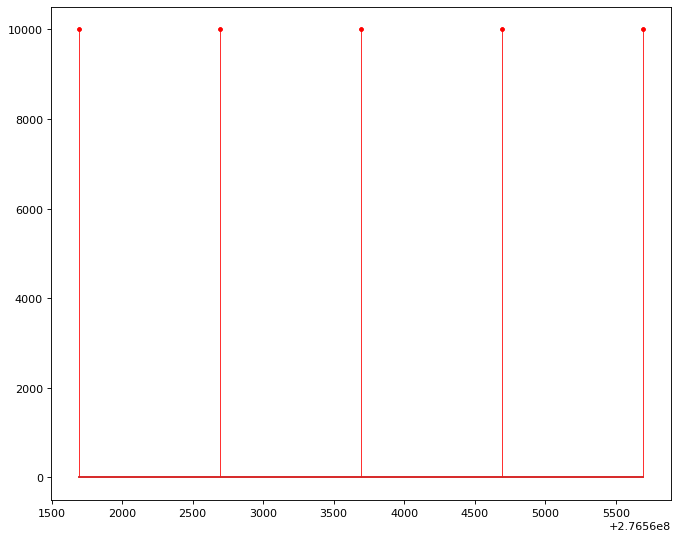

In [8]:
r1 = 9999
r2 = 0.7
l = 0.15
R1=0.999
R2=0.999
figure(figsize=(10, 8), dpi=80)
g1 = g(r1,l)
g2 = g(r2,l)
print(g1*g2)
x = []
y=[]

lsize =0.5

for i in range(0,5):
    x.append(int(ω_qnm(276753+i,0,0,r1,r2,l))/1e6)
    y.append(int(100*100))

markers,stems,base = plt.stem(x,y,'r')
stems.set_linewidth(lsize)
markers.set_marker('.')

markers,stems,base = plt.stem(x,y,'r')
stems.set_linewidth(lsize)
markers.set_marker('.')
for i in range (0,10):
    for j in range(1,10):
        for k in range(0,10):
            x.append(int(ωc_qnm(276753*2+i,j,k,r1,r2,l))/1e6)
            y.append(int(100*0.7**j*100*0.7**k))

markers,stems,base = plt.stem(x,y,'r')
stems.set_linewidth(lsize)
markers.set_marker('.')

print('fsr=',fsr(l)/1e6,'MHz')
print('finesse =', finesse(R1,R2))
print('linewidth=', fsr(l)/finesse(R1,R2)/1000,'kHz')
stems.set_linewidth(lsize)
plt.xlabel("frequency/MHz")
plt.ylabel("relative amplitude")
plt.show()

(262230500.0, 262230750.0)

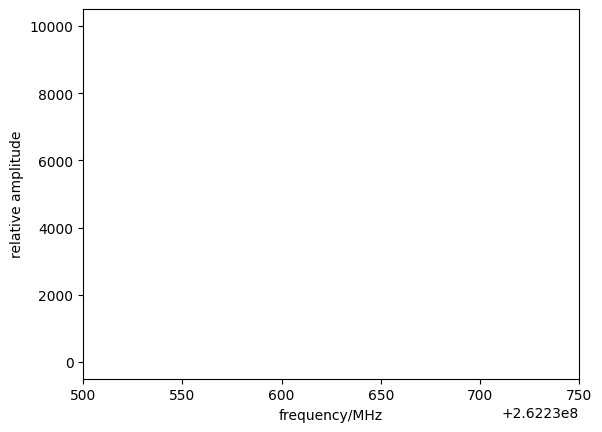

In [ ]:
x = []
y=[]

lsize =0.5

for i in range(0,5):
    x.append(int(ω_qnm(276753+i,0,0,r1,r2,l))/1e6)
    y.append(int(100*100))

markers,stems,base = plt.stem(x,y,'r')
stems.set_linewidth(lsize)
markers.set_marker('.')

markers,stems,base = plt.stem(x,y,'r')
stems.set_linewidth(lsize)
markers.set_marker('.')
for i in range (0,10):
    for j in range(1,10):
        for k in range(0,10):
            x.append(int(ωc_qnm(276753*2+i,j,k,r1,r2,l))/1e6)
            y.append(int(100*0.7**j*100*0.7**k))

# for i in range (0,10):
#     for j in range(1,10):
#         x.append(int(ωct_qnm(276753*2+i,j,0,r1,r2,l))/1e6)
#         y.append(int(100*0.7**j*100))

markers,stems,base = plt.stem(x,y,'r')
stems.set_linewidth(lsize)
markers.set_marker('.')
plt.xlabel("frequency/MHz")
plt.ylabel("relative amplitude")
plt.xlim(500+2.6223e8,750+2.6223e8)


Text(0.5, 0, 'frequency/kHz')

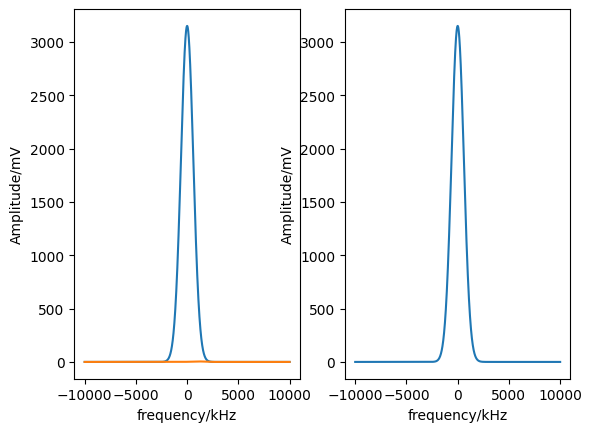

In [ ]:
# Define the Gaussian function
def gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

mu1 = 0
sigma1 = 600 
A1 = 3.15*1000

mu2 = 1000
sigma2 = 600 
A2 = 5

x1 = np.linspace(-10000,10000,10000)
y1 = gauss(x1,A1,mu1,sigma1)
y2 = gauss(x1,A2,mu2,sigma2)
ytot = y1 + y2
plt.subplot(1,2,1)
plt.plot(x1,y1)
plt.plot(x1,y2)
plt.ylabel("Amplitude/mV")
plt.xlabel("frequency/kHz")

plt.subplot(1,2,2)
plt.plot(x1,ytot)

plt.ylabel("Amplitude/mV")
plt.xlabel("frequency/kHz")

In [ ]:
from scipy.optimize import curve_fit

parameters, covariance = curve_fit(gauss, x1, ytot)
fit_A = parameters[0]
fit_B = parameters[1]

print("shifted center ampilitude:",fit_A,"mV")
print("shifted center frequency:",fit_B,"kHz")


shifted center ampilitude: 3150.7638493841773 mV
shifted center frequency: 0.793471852437415 kHz


In [ ]:
mu_fit = []
A_s = np.linspace(0,3150,315)
for A_scan in range (0,3150,10):
    y2 = gauss(x1,A_scan,mu2,sigma2)
    ytot = y1 + y2
    parameters, covariance = curve_fit(gauss, x1, ytot)
    mu_fit.append(parameters[1])


Text(0, 0.5, 'center frequency shifted/kHz')

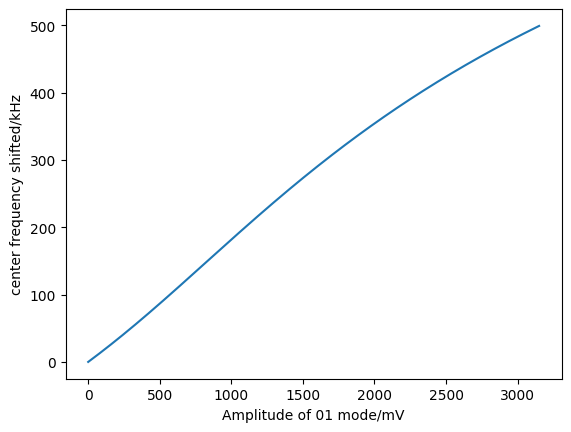

In [ ]:
plt.plot(A_s,mu_fit)
plt.xlabel("Amplitude of 01 mode/mV")
plt.ylabel("center frequency shifted/kHz")

In [ ]:
dis = 10e-3
width = 4.6e-6
lin_re = fsr(l)/1e6*width/dis
print('the real linewidth is:',lin_re,'MHz')

the real linewidth is: 0.4596817689333334 MHz


In [ ]:
waistcc = waist(np.array([1083e-9,852e-9]),l,1)
print('waist on concave mirror [seed] =',waistcc[0]/1e-6,'μm')
print('waist on concave mirror [Cs] =',waistcc[1]/1e-6,'μm')

waist on concave mirror [seed] = 313.306333772754 μm
waist on concave mirror [Cs] = 277.8911677109482 μm
